<a href="https://colab.research.google.com/github/christophersingh/Master/blob/main/Time_Series_After_Super_Bowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/christophersingh/Times-Series-Analysis-For-Milk-Production/blob/master/data/monthly_milk_production.csv?raw=true')
df['Date'] = pd.to_datetime(df['Month'])
df['Temp'] = df['Production']
df.drop(['Production', 'Month'], axis=1, inplace=True)
df = df.set_index('Date')
df.sort_index(inplace=True)
y = df['Temp']
df

,Temp
Date,
1962-01-01,578.3
1962-02-01,609.8
1962-03-01,628.4
1962-04-01,665.6
1962-05-01,713.8
...,...
1974-08-01,851.3
1974-09-01,826.9
1974-10-01,797.3


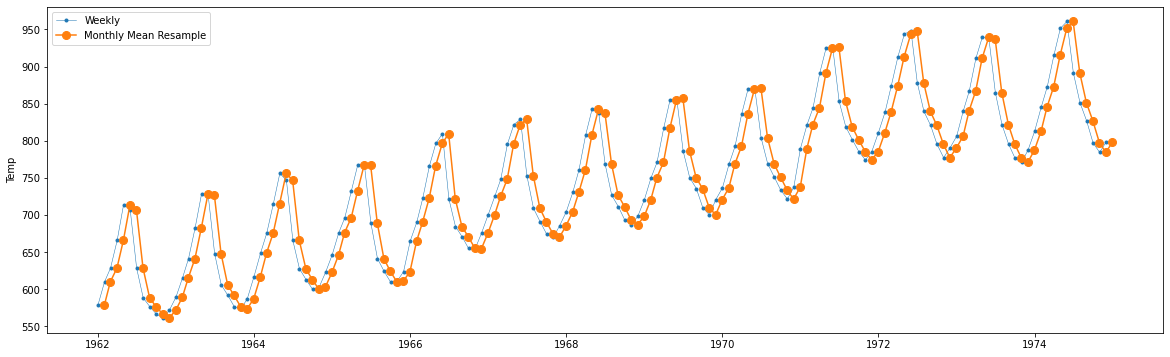

In [105]:
import warnings
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Temp')
ax.legend();
pass;

In [106]:
y

Date
1962-01-01    578.3
1962-02-01    609.8
1962-03-01    628.4
1962-04-01    665.6
1962-05-01    713.8
              ...  
1974-08-01    851.3
1974-09-01    826.9
1974-10-01    797.3
1974-11-01    784.3
1974-12-01    798.2
Name: Temp, Length: 156, dtype: float64

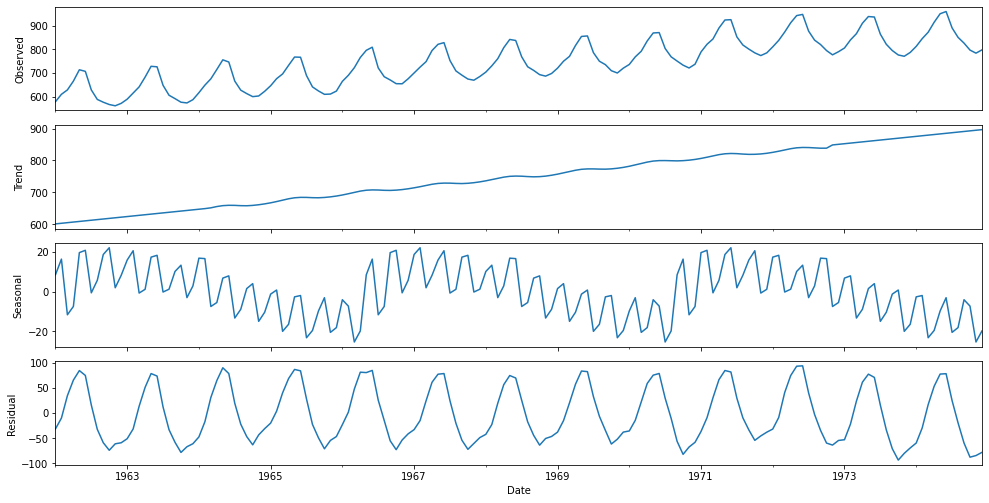

In [107]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq', freq=52)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    pass;

seasonal_decompose(y)

In [108]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [109]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.178
P-value = 0.683
Critical values :
	1%: -3.4769274060112707 - The data is not stationary with 99% confidence
	5%: -2.8819726324025625 - The data is not stationary with 95% confidence
	10%: -2.577665408088415 - The data is not stationary with 90% confidence


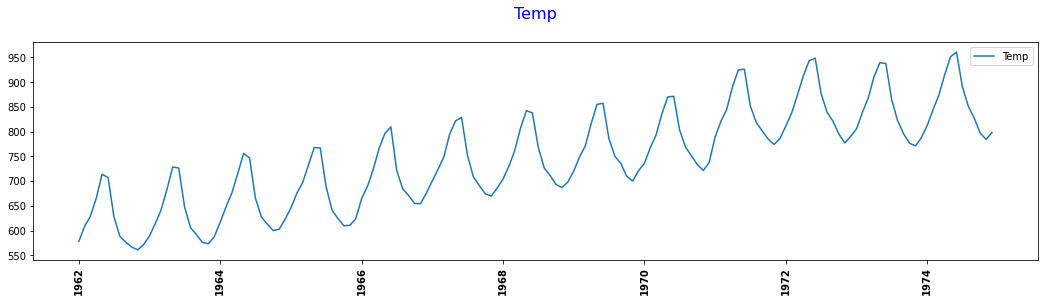

In [110]:
plt.figure(figsize=(18,4))
plt.plot(df, label='Temp')
plt.legend(loc='best')
plt.title('Temp\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

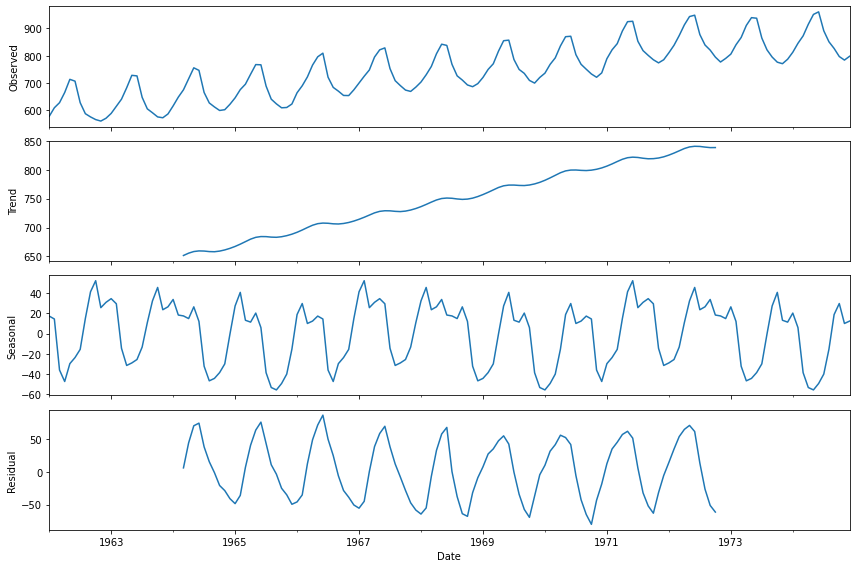

In [111]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Temp, model='additive', freq=52) # additive seasonal index
fig = decomposition.plot()
plt.show()

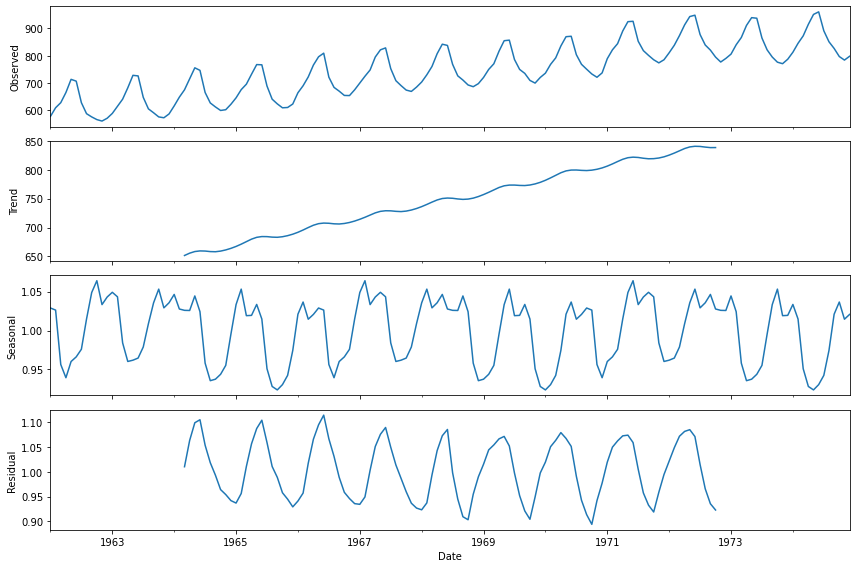

In [112]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Temp, model='multiplicative', freq=52) # additive seasonal index
fig = decomposition.plot()
plt.show()

In [113]:
train_len = 108
train = df[0 : train_len]
test = df[train_len : ]

In [114]:
train

,Temp
Date,
1962-01-01,578.3
1962-02-01,609.8
1962-03-01,628.4
1962-04-01,665.6
1962-05-01,713.8
...,...
1970-08-01,768.8
1970-09-01,750.8
1970-10-01,733.4


In [115]:
test

,Temp
Date,
1971-01-01,789.4
1971-02-01,821.8
1971-03-01,844.4
1971-04-01,890.8
1971-05-01,924.9
1971-06-01,926.3
1971-07-01,853.2
1971-08-01,818.9
1971-09-01,801.5


Simple Time Series Naive Method

In [116]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Temp'][train_len-1]

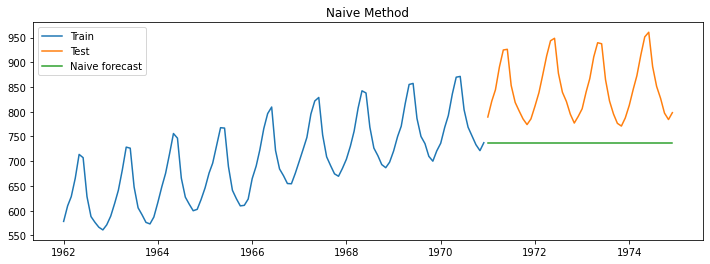

In [117]:
plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_naive['naive_forecast'])/test['Temp'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.6


Simple Average Method

In [119]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Temp'].mean()

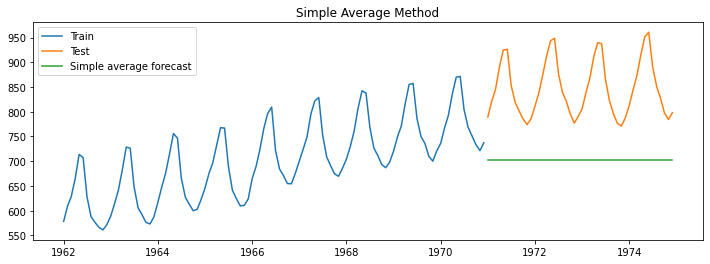

In [120]:
plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [121]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_avg['avg_forecast'])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83


Simple Moving Average Method

In [122]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['Temp'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

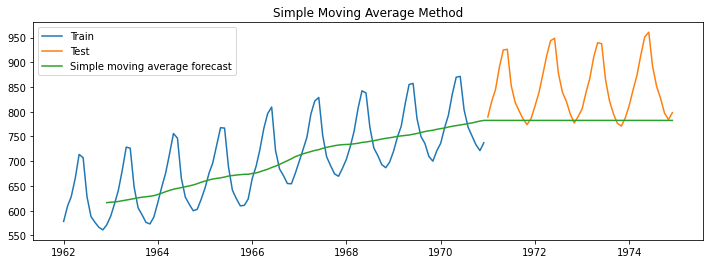

In [123]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [124]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_sma['sma_forecast'][train_len:])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41


Exponential Smoothing Techniques

Simple exponential smoothing


In [125]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temp'])
model_fit = model.fit(optimized=True)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


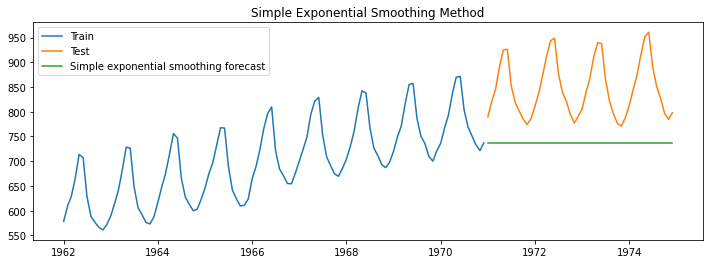

In [126]:
plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [127]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_ses['ses_forecast'])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60


Holt's Winter With Trend

In [129]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temp']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.9999999951582615, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 550.5317568865349, 'initial_slope': 24.557976046749094, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


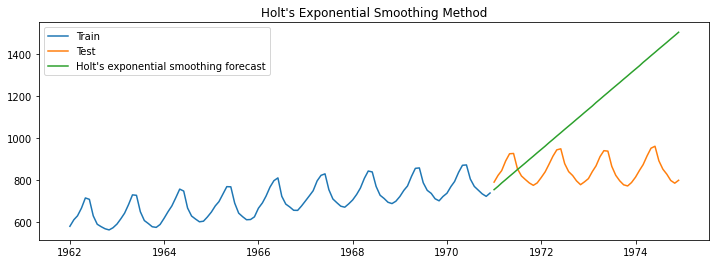

In [130]:
plt.figure(figsize=(12,4))
plt.plot( train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [131]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_holt['holt_forecast'])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95


Holt's Winter Additive With Trend and Seasonality

In [132]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temp']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2631578923954823, 'smoothing_slope': 0.043928260193775784, 'smoothing_seasonal': 0.7368421029217981, 'damping_slope': nan, 'initial_level': 651.7482497633159, 'initial_slope': 0.9870741077013943, 'initial_seasons': array([ -80.60331849,  -50.35152188,  -32.21400716,    3.92202555,
         50.85407505,   43.79965105,  -35.63160954,  -76.40636719,
        -88.38124862,  -97.93686882, -102.30668066,  -91.21326221]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


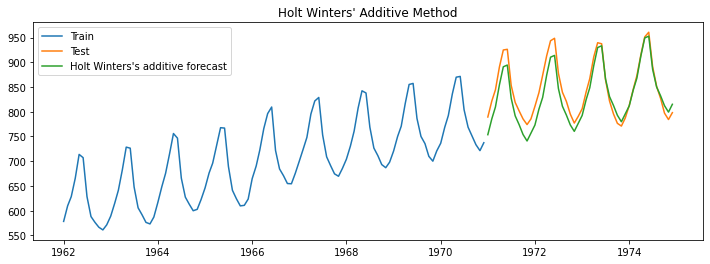

In [133]:
plt.figure(figsize=(12,4))
plt.plot( train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [134]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_hwa['hw_forecast'])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38


Holt Winter's multiplicative method with trend and seasonality


In [135]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temp']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6315789472964868, 'smoothing_slope': 0.05263156082072468, 'smoothing_seasonal': 0.3684210525596447, 'damping_slope': nan, 'initial_level': 661.7777705833817, 'initial_slope': 1.182638481580687, 'initial_seasons': array([0.88250943, 0.92520928, 0.95447102, 1.0072383 , 1.07602538,
       1.07392203, 0.95762658, 0.89145842, 0.86452501, 0.84255426,
       0.83578272, 0.85457284]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [136]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_hwm['hw_forecast'])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48


**Conclusion: Holt Winters' additive method	is the best because it provided the lowest values**

In [137]:
print()

**Moving onto Auto Regressive Models**

Auto Regressive methods

Check whether the time series is stationary

Augmented Dickey-Fuller (ADF) test

In [138]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Temp'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -1.177724
Critical Values @ 0.05: -2.88
p-value: 0.683104


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


In [139]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Temp'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.092276
Critical Values @ 0.05: 0.46
p-value: 0.010000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


To make the series stationary, we need to perform transformation and differencing.

Box Cox transformation to make variance constant

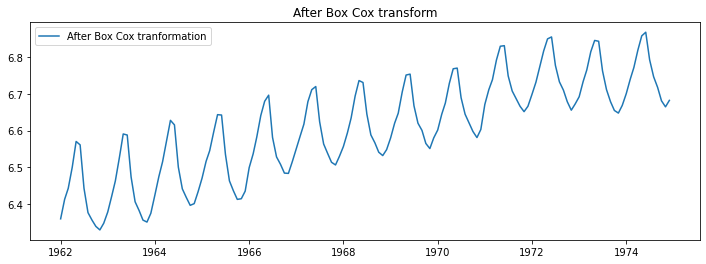

In [140]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df['Temp'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

Differencing to remove trend


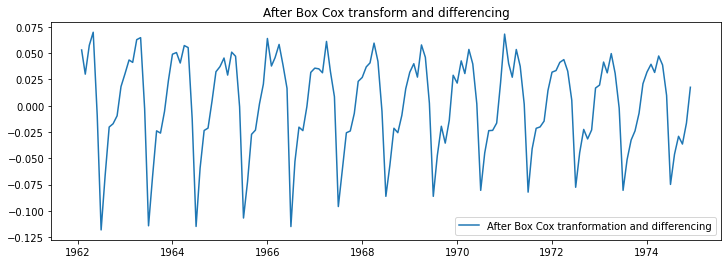

In [141]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [142]:
data_boxcox_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

**  ** 
**Now let us see whether our series has become stationary.**

**Augmented Dickey-Fuller (ADF) test**

In [143]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.791943
Critical Values @ 0.05: -2.88
p-value: 0.059434


In [144]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.102302
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [145]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [146]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.003342
ar.L1.y    0.626563
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [147]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

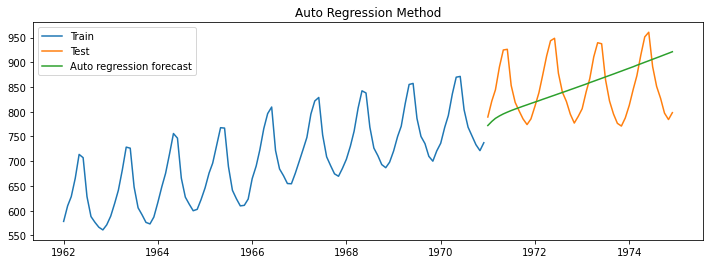

In [149]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [150]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_ar['ar_forecast'][test.index.min():])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48
0,Autoregressive (AR) method,69.63,6.86


Moving average method (MA)

In [151]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.002711
ma.L1.y    0.643136
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [152]:
# Recover original time series

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

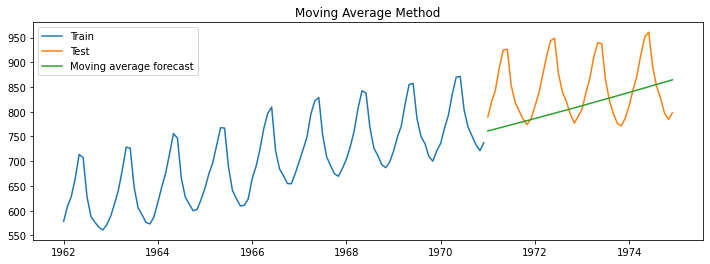

In [154]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(df['Temp'][:train_len], label='Train')
plt.plot(df['Temp'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [155]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_ma['ma_forecast'][test.index.min():])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48
0,Autoregressive (AR) method,69.63,6.86
0,Moving Average (MA) method,73.43,6.69


Auto regression moving average method (ARMA)


In [156]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const      0.002424
ar.L1.y    0.839208
ma.L1.y   -0.999981
dtype: float64


In [157]:
# Recover original time series

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

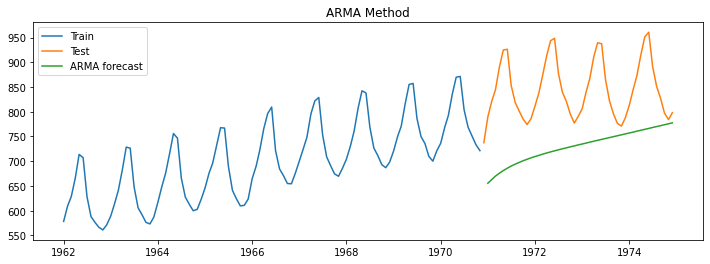

In [158]:

plt.figure(figsize=(12,4))
plt.plot( df['Temp'][:train_len-1], label='Train')
plt.plot(df['Temp'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [159]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_arma['arma_forecast'][train_len-1:])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48
0,Autoregressive (AR) method,69.63,6.86
0,Moving Average (MA) method,73.43,6.69
0,Autoregressive moving average (ARMA) method,134.11,13.49


Auto regressive integrated moving average (ARIMA)


In [160]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.002424
ar.L1.D.y    0.839208
ma.L1.D.y   -0.999981
dtype: float64


In [161]:
# Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

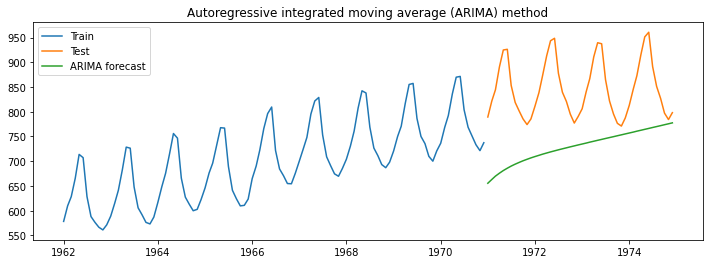

In [164]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [165]:
rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_arima['arima_forecast'][test.index.min():])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48
0,Autoregressive (AR) method,69.63,6.86
0,Moving Average (MA) method,73.43,6.69
0,Autoregressive moving average (ARMA) method,134.11,13.49


Seasonal auto regressive integrated moving average (SARIMA)


In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.502462
ma.L1       0.383711
ar.S.L12   -0.434025
ma.S.L12    0.061180
sigma2      0.000068
dtype: float64


In [167]:

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

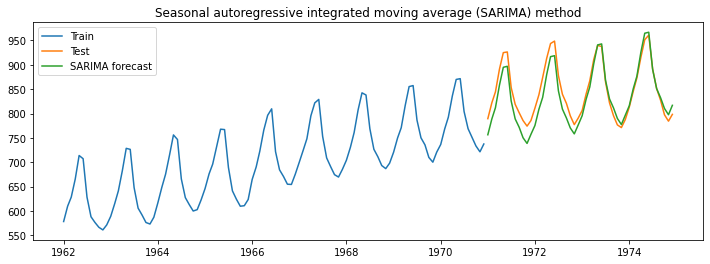

In [168]:

plt.figure(figsize=(12,4))
plt.plot(train['Temp'], label='Train')
plt.plot(test['Temp'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [169]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Temp'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Temp']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,123.78,12.60
0,Simple average method,156.39,16.83
0,Simple moving average forecast,86.19,7.41
0,Simple exponential smoothing forecast,123.78,12.60
0,Holt's exponential smoothing method,362.83,35.95
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48
0,Autoregressive (AR) method,69.63,6.86
0,Moving Average (MA) method,73.43,6.69
0,Autoregressive moving average (ARMA) method,134.11,13.49


In [171]:
results.sort_values('MAPE')

,Method,RMSE,MAPE
0,Seasonal autoregressive integrated moving aver...,22.69,2.28
0,Holt Winters' additive method,23.76,2.38
0,Holt Winters' multiplicative method,23.95,2.48
0,Moving Average (MA) method,73.43,6.69
0,Autoregressive (AR) method,69.63,6.86
0,Simple moving average forecast,86.19,7.41
0,Naive method,123.78,12.60
0,Simple exponential smoothing forecast,123.78,12.60
0,Autoregressive moving average (ARMA) method,134.11,13.49
0,Autoregressive integrated moving average (ARIM...,134.11,13.49
